## The most Nobel of Prizes

### Project Scope
Analyzing and Visualizing data to observe trends within the winners of the Nobel Prize dating back to 1901


In [2]:

import pandas as pd 
import numpy as np
import seaborn as sns
# Reading in the Nobel Prize data
nobel = pd.read_csv('datasets/nobel.csv')

# Taking a look at the first several winners

nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## So, who gets the Nobel Prize?


In [3]:
#number of Nobel Prizes handed
# out between 1901 and 2016

display(len(nobel))
#number of prizes won by male and female recipients.

display(nobel['sex'].value_counts())

#number of prizes won by the top 10 nationalities.

nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

## USA dominance


In [4]:
nobel[(nobel['year'] > 1930) & (nobel['year'] < 1980)] 

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
156,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,189,Individual,Carl Bosch,1874-08-27,Cologne,Germany,Male,University of Heidelberg,Heidelberg,Germany,1940-04-26,Heidelberg,Germany
157,1931,Chemistry,The Nobel Prize in Chemistry 1931,"""in recognition of their contributions to the ...",1/2,190,Individual,Friedrich Bergius,1884-10-11,"Goldschmieden, near Breslau",Germany (Poland),Male,University of Heidelberg,Heidelberg,Germany,1949-03-30,Buenos Aires,Argentina
158,1931,Literature,The Nobel Prize in Literature 1931,"""The poetry of Erik Axel Karlfeldt""",1/1,604,Individual,Erik Axel Karlfeldt,1864-07-20,Karlbo,Sweden,Male,NaN,NaN,NaN,1931-04-08,Stockholm,Sweden
159,1931,Medicine,The Nobel Prize in Physiology or Medicine 1931,"""for his discovery of the nature and mode of a...",1/1,322,Individual,Otto Heinrich Warburg,1883-10-08,Freiburg im Breisgau,Germany,Male,Kaiser-Wilhelm-Institut (now Max-Planck-Instit...,Berlin-Dahlem,Germany,1970-08-01,West Berlin,West Germany (Germany)
160,1931,Peace,The Nobel Peace Prize 1931,NaN,1/2,496,Individual,Jane Addams,1860-09-06,"Cedarville, IL",United States of America,Female,NaN,NaN,NaN,1935-05-21,"Chicago, IL",United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,1979,Medicine,The Nobel Prize in Physiology or Medicine 1979,"""for the development of computer assisted tomo...",1/2,418,Individual,Godfrey N. Hounsfield,1919-08-28,Newark,United Kingdom,Male,"Central Research Laboratories, EMI",London,United Kingdom,2004-08-12,Kingston upon Thames,United Kingdom
501,1979,Peace,The Nobel Peace Prize 1979,NaN,1/1,540,Organization,Mother Teresa,1910-08-26,Uskup (Skopje),Ottoman Empire (Republic of Macedonia),Female,NaN,NaN,NaN,1997-09-05,Calcutta,India
502,1979,Physics,The Nobel Prize in Physics 1979,"""for their contributions to the theory of the ...",1/3,113,Individual,Sheldon Lee Glashow,1932-12-05,"New York, NY",United States of America,Male,"Harvard University, Lyman Laboratory","Cambridge, MA",United States of America,NaN,NaN,NaN
503,1979,Physics,The Nobel Prize in Physics 1979,"""for their contributions to the theory of the ...",1/3,114,Individual,Abdus Salam,1926-01-29,Jhang Maghi&#257;na,India (Pakistan),Male,International Centre for Theoretical Physics,Trieste,Italy,1996-11-21,Oxford,United Kingdom


In [5]:
def decade_classifier(col):
    
    string_list =[]
    nineteen = []
    two_thousand = []
    list_col = list(col) 
    final_list = []
    
    for i in list_col:
        i2=str(i)
        string_list.append(i2)
        
    for s in string_list: 
        if s[0] == '1':
            nineteen.append(s)
        else:
            two_thousand.append(s)
    
    for year in nineteen: 
        final_list.append('19'+year[2]+'0')
    
    for year in two_thousand:
        final_list.append('20'+year[2]+'0')
        
    for n in final_list:
        n = int(n)
    
    return final_list
        

        

In [6]:
def is_american(col): 
    
    list_col = list(col)
    for country in list_col:
        
        if country == 'United States of America':
            return True
        else: 
            return False

In [7]:
result1 = decade_classifier(nobel['year'])

In [8]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = result1
nobel['decade'] = nobel['decade'].apply(int)
prop_usa_winners = nobel.groupby('decade',as_index=False)['usa_born_winner'].mean()




In [9]:
nobel['decade'][0]

1900

## USA dominance, visualized


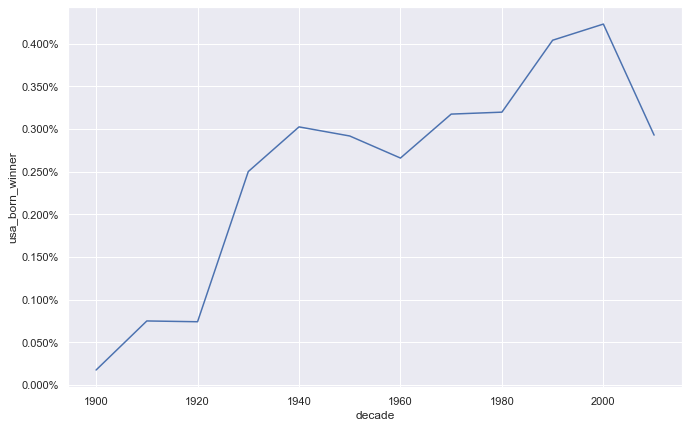

In [10]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade',y='usa_born_winner',data=prop_usa_winners)

# Adding %-formatting to the y-axis
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

## What is the gender of a typical Nobel Prize winner?


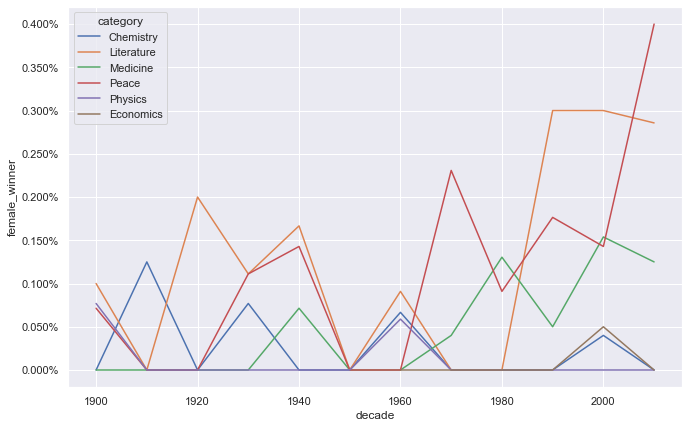

In [11]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade','category'],as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis


ax = sns.lineplot(x='decade',y='female_winner',data=prop_female_winners,hue='category')
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

## The first woman to win the Nobel Prize


In [12]:
# Picking out the first woman to win a Nobel Prize

female_winners = nobel[nobel['sex']=='Female']
female_winners.nsmallest(5,'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,...,Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,False,1900,True
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,...,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",...,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,False,1920,True


## Repeat laureates


In [13]:
# Selecting the laureates that have received 2 or more prizes.

nobel.groupby('full_name').filter(lambda x:  len(x) > 1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


## How old are you when you get the prize?


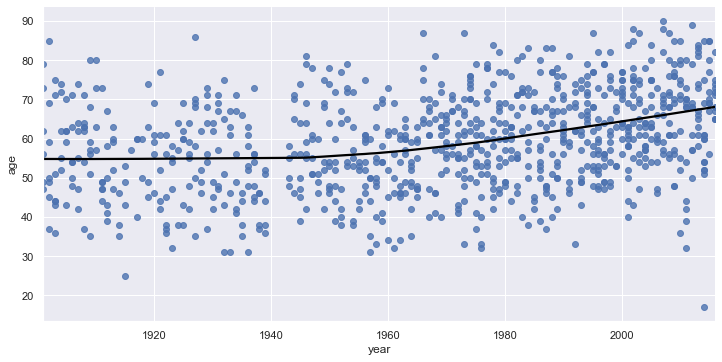

In [14]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year']-nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year',y='age',data=nobel,lowess=True, aspect=2, line_kws={'color':'black'})

## Age differences between prize categories


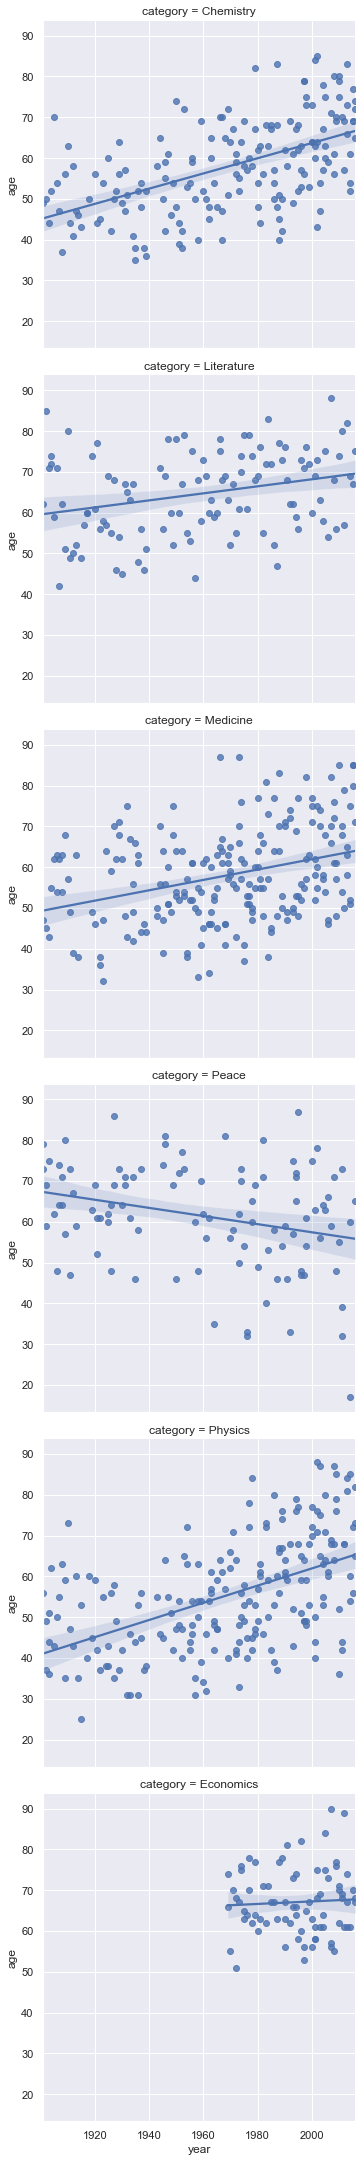

In [15]:
# Same plot as above, but separate plots for each type of Nobel Prize

sns.lmplot(x='year',y='age',data=nobel,row='category')

## Oldest and youngest winners
<p>More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger! </p>
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [16]:
# The oldest winner of a Nobel Prize as of 2016

display(nobel.nlargest(1,'age'))
# The youngest winner of a Nobel Prize as of 2016

display(nobel.nsmallest(1,'age'))

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


In [17]:
# The name of the youngest winner of the Nobel Prize as of 2016
youngest_winner = 'Malala'